In [1]:
from qiskit_machine_learning.utils import algorithm_globals

algorithm_globals.random_seed = 42 # Set the random seed

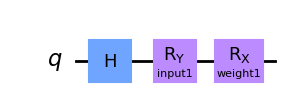

In [2]:
from qiskit.circuit import Parameter
from qiskit import QuantumCircuit

# Create a quantum circuit with 1 qubit and 1 gate parameters 
params1 = [Parameter("input1"), Parameter("weight1")]
qc1 = QuantumCircuit(1) # Create quantum circuit with 1 qubit
qc1.h(0)
qc1.ry(params1[0], 0) # Rotates qubit 0 by angle of the input parameter
qc1.rx(params1[1], 0) # Rotates qubit 0 by angle of the weight parameter
qc1.draw("mpl", style="clifford")

In [3]:
from qiskit.quantum_info import SparsePauliOp

# Define PauliY observable for EstimatorQNN
observable1 = SparsePauliOp.from_list([("Y" * qc1.num_qubits, 1)])

In [4]:
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit.primitives import StatevectorEstimator as Estimator

estimator = Estimator() # Choose the simulation estimator (outputs expectation value)
estimator_qnn = EstimatorQNN(
    circuit=qc1,
    observables=observable1,
    input_params=[params1[0]],
    weight_params=[params1[1]],
    estimator=estimator,
)

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


input parameters: ['input[0]', 'input[1]']
weight parameters: ['weight[0]', 'weight[1]', 'weight[2]', 'weight[3]']


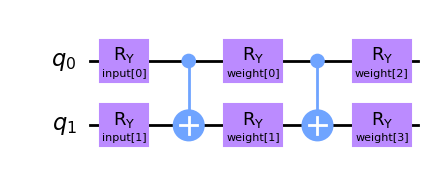

In [5]:
from qiskit.circuit import ParameterVector

# Define inputs and weights
inputs2 = ParameterVector("input", 2)
weights2 = ParameterVector("weight", 4)
print(f"input parameters: {[str(item) for item in inputs2.params]}")
print(f"weight parameters: {[str(item) for item in weights2.params]}")

# Create a second quantum circuit with 2 qubits and 4 weights
qc2 = QuantumCircuit(2)
qc2.ry(inputs2[0], 0)
qc2.ry(inputs2[1], 1)
qc2.cx(0, 1)
qc2.ry(weights2[0], 0)
qc2.ry(weights2[1], 1)
qc2.cx(0, 1)
qc2.ry(weights2[2], 0)
qc2.ry(weights2[3], 1)

qc2.draw("mpl", style="clifford")

In [6]:
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit.primitives import StatevectorSampler as Sampler

sampler = Sampler() # Choose the simulation sampler (outputs probability distribution)
sampler_qnn = SamplerQNN(circuit=qc2, input_params=inputs2, weight_params=weights2, sampler=sampler)
sampler_qnn

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


In [15]:
# Set random values for input and weight parameters
# Input parameters rotate their respective qubit by that decimal amount
# If the initial bitstring is defined, there are no input parameters
estimator_qnn_input = algorithm_globals.random.random(estimator_qnn.num_inputs) # Random number in [0,1)
estimator_qnn_weights = algorithm_globals.random.random(estimator_qnn.num_weights)
print(f"estimator_qnn_input: {estimator_qnn_input}")
print(f"estimator_qnn_weights: {estimator_qnn_weights}")

sampler_qnn_input = algorithm_globals.random.random(sampler_qnn.num_inputs)
sampler_qnn_weights = algorithm_globals.random.random(sampler_qnn.num_weights)
print(f"sampler_qnn_input: {sampler_qnn_input}")
print(f"sampler_qnn_weights: {sampler_qnn_weights}")

estimator_qnn_input: [0.55458479]
estimator_qnn_weights: [0.06381726]
sampler_qnn_input: [0.82763117 0.6316644 ]
sampler_qnn_weights: [0.75808774 0.35452597 0.97069802 0.89312112]


In [8]:
# Non-batch EstimatorQNN forward pass
estimator_qnn_forward = estimator_qnn.forward(estimator_qnn_input, estimator_qnn_weights)

print(
    f"Forward pass result for EstimatorQNN: {estimator_qnn_forward}. \nShape: {estimator_qnn_forward.shape}"
)

Forward pass result for EstimatorQNN: [[0.28517721]]. 
Shape: (1, 1)


In [9]:
# Non-batched SamplerQNN forward pass
sampler_qnn_forward = sampler_qnn.forward(sampler_qnn_input, sampler_qnn_weights)

print(
    f"Forward pass result for SamplerQNN: {sampler_qnn_forward}.  \nShape: {sampler_qnn_forward.shape}"
)

Forward pass result for SamplerQNN: [[0.01953125 0.2578125  0.53320312 0.18945312]].  
Shape: (1, 4)


In [13]:
# Batched EstimatorQNN forward pass
estimator_qnn_forward_batched = estimator_qnn.forward(
    [estimator_qnn_input, estimator_qnn_input], estimator_qnn_weights
)

print(
    f"Forward pass result for EstimatorQNN: {estimator_qnn_forward_batched}.  \nShape: {estimator_qnn_forward_batched.shape}"
)

Forward pass result for EstimatorQNN: [[0.30719404]
 [0.30474099]].  
Shape: (2, 1)


In [11]:
# Batched SamplerQNN forward pass
sampler_qnn_forward_batched = sampler_qnn.forward(
    [sampler_qnn_input, sampler_qnn_input], sampler_qnn_weights
)

print(
    f"Forward pass result for SamplerQNN: {sampler_qnn_forward_batched}.  \nShape: {sampler_qnn_forward_batched.shape}"
)

Forward pass result for SamplerQNN: [[0.01953125 0.22363281 0.55859375 0.19824219]
 [0.01367188 0.23925781 0.5546875  0.19238281]].  
Shape: (2, 4)


In [16]:
# Backward pass for EstimatorQNN, with input gradients
estimator_qnn.input_gradients = True
estimator_qnn_input_grad, estimator_qnn_weight_grad = estimator_qnn.backward(
    estimator_qnn_input, estimator_qnn_weights
)

print(
    f"Input gradients for EstimatorQNN: {estimator_qnn_input_grad}.  \nShape: {estimator_qnn_input_grad}"
)
print(
    f"Weight gradients for EstimatorQNN: {estimator_qnn_weight_grad}.  \nShape: {estimator_qnn_weight_grad.shape}"
)

Input gradients for EstimatorQNN: [[[0.05421545]]].  
Shape: [[[0.05421545]]]
Weight gradients for EstimatorQNN: [[[0.52551842]]].  
Shape: (1, 1, 1)


In [17]:
# Backward pass for SamplerQNN, with input gradients
sampler_qnn.input_gradients = True
sampler_qnn_input_grad, sampler_qnn_weight_grad = sampler_qnn.backward(
    sampler_qnn_input, sampler_qnn_weights
)

print(
    f"Input gradients for SamplerQNN: {sampler_qnn_input_grad}.  \nShape: {sampler_qnn_input_grad.shape}"
)
print(
    f"Weight gradients for SamplerQNN: {sampler_qnn_weight_grad}.  \nShape: {sampler_qnn_weight_grad.shape}"
)

Input gradients for SamplerQNN: [[[-0.14355469 -0.24755859]
  [ 0.30322266 -0.14892578]
  [-0.15332031  0.05761719]
  [-0.00634766  0.33886719]]].  
Shape: (1, 4, 2)
Weight gradients for SamplerQNN: [[[-0.00878906 -0.24072266 -0.18212891 -0.07519531]
  [-0.07714844  0.11767578  0.16699219 -0.39892578]
  [-0.19189453  0.14648438 -0.16357422  0.07470703]
  [ 0.27783203 -0.0234375   0.17871094  0.39941406]]].  
Shape: (1, 4, 4)


In [18]:
# Forward and backward pass for EstimatorQNN with multiple observables, no input gradients
observable2 = SparsePauliOp.from_list([("Z" * qc1.num_qubits, 1)])

estimator_qnn2 = EstimatorQNN(
    circuit=qc1,
    observables=[observable1, observable2],
    input_params=[params1[0]],
    weight_params=[params1[1]],
    estimator=estimator,
)

estimator_qnn_forward2 = estimator_qnn2.forward(estimator_qnn_input, estimator_qnn_weights)
estimator_qnn_input_grad2, estimator_qnn_weight_grad2 = estimator_qnn2.backward(
    estimator_qnn_input, estimator_qnn_weights
)

print(f"Forward output for EstimatorQNN1: {estimator_qnn_forward.shape}")
print(f"Forward output for EstimatorQNN2: {estimator_qnn_forward2.shape}")
print(f"Backward output for EstimatorQNN1: {estimator_qnn_weight_grad.shape}")
print(f"Backward output for EstimatorQNN2: {estimator_qnn_weight_grad2.shape}")

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Forward output for EstimatorQNN1: (1, 1)
Forward output for EstimatorQNN2: (1, 2)
Backward output for EstimatorQNN1: (1, 1, 1)
Backward output for EstimatorQNN2: (1, 2, 1)


In [ ]:
# Define an interpret function (parity) for SamplerQNN, and run a forward and backward pass
parity = lambda x: "{:b}".format(x).count("1") % 2
output_shape = 2  # parity = 0, 1

sampler_qnn2 = SamplerQNN(
    circuit=qc2,
    input_params=inputs2,
    weight_params=weights2,
    interpret=parity,
    output_shape=output_shape,
    sampler=sampler,
)

sampler_qnn_forward2 = sampler_qnn2.forward(sampler_qnn_input, sampler_qnn_weights)
sampler_qnn_input_grad2, sampler_qnn_weight_grad2 = sampler_qnn2.backward(
    sampler_qnn_input, sampler_qnn_weights
)

print(f"Forward output for SamplerQNN1: {sampler_qnn_forward.shape}")
print(f"Forward output for SamplerQNN2: {sampler_qnn_forward2.shape}")
print(f"Backward output for SamplerQNN1: {sampler_qnn_weight_grad.shape}")
print(f"Backward output for SamplerQNN2: {sampler_qnn_weight_grad2.shape}")